## Do Imports

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', None)

## Read in Data Files

In [62]:
# Read WHO morbidity data
df_mort = pd.read_csv('Resources/source_data/Morticd10_part5_rev.csv')

# Read WHO country names with codes, to be merged with morbidity data
df_countries = pd.read_csv('Resources/source_data/country_codes.csv')

# Read the list of countries to be used for our reporting
df_filtered_countries = pd.read_csv('Resources/source_data/filtered_countries.csv')

# Read the ICD 10 codes data for versions 103 and 104
df_icd10 = pd.read_csv('Resources/source_data/ICDCodeSet.csv')

# Read the ICD 10 codes data for version 101
df_icd10_version_101 = pd.read_csv('Resources/source_data/ICD10_codes_v101.csv')

# Read the ICD 10 cateogries data
df_icd10_categories = pd.read_csv('Resources/source_data/ICD10_categories.csv')

C:\Users\jagat\AppData\Local\Temp\ipykernel_25632\3177783227.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mort = pd.read_csv('Resources/source_data/Morticd10_part5_rev.csv')


## Validate the imported data
Show the first few rows of each DataFrame

In [63]:
display(df_mort.head(2))
display(df_countries.head(2))
display(df_filtered_countries.head(2))
display(df_icd10.head(2))
display(df_icd10_categories.head(2))
display(df_icd10_version_101.head(2))

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,4303,NaN,NaN,2017,101,1000,1,1,8,281784,...,43174.0,29856.0,29184.0,NaN,NaN,68.0,1608.0,NaN,NaN,NaN
1,4303,NaN,NaN,2017,101,1000,2,1,8,292339,...,56037.0,52655.0,88271.0,NaN,NaN,19.0,1178.0,NaN,NaN,NaN


,country,name
0,1010,Algeria
1,1020,Angola


,Country,Country Name,Region
0,5020,Australia,Oceania
1,2070,Brazil,South America


,ICDCode,Description
0,A000,"Cholera due to Vibrio cholerae 01, biovar c..."
1,A001,"Cholera due to Vibrio cholerae 01, biovar e..."


,code_set,code_description
0,A00-B99,Infectious and parasitic diseases
1,C00-D49,Neoplasms


,code,detailed_list_numbers,cause
0,1000,NaN,All causes
1,1001,A00-B99,Certain infectious and parasitic diseases


## Create a new DataFrame for cleaning

In [64]:
# Copy the df_mort DataFrame into a new DataFrame named `df_cleaning`
df_cleaning = df_mort.copy()
display(df_cleaning.head(2))

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,4303,NaN,NaN,2017,101,1000,1,1,8,281784,...,43174.0,29856.0,29184.0,NaN,NaN,68.0,1608.0,NaN,NaN,NaN
1,4303,NaN,NaN,2017,101,1000,2,1,8,292339,...,56037.0,52655.0,88271.0,NaN,NaN,19.0,1178.0,NaN,NaN,NaN


## Update the DataFrame to use the filtered set of countries
The `filtered_countries.csv` file contains a list of 12 countries we are focusing on for our project. Our DataFrame should be filtered to this set.

In [65]:
df_merged = df_cleaning.merge(df_filtered_countries, on='Country', how='inner')
display(df_merged.head(3))
display(df_merged.tail(3))

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,Country Name,Region
0,4160,NaN,NaN,2017,103,A02,1,0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Iceland,Northern Europe
1,4160,NaN,NaN,2017,103,A04,1,0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Iceland,Northern Europe
2,4160,NaN,NaN,2017,103,A08,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Iceland,Northern Europe


,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,Country Name,Region
227828,5020,NaN,NaN,2022,104,Y883,2,0,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Australia,Oceania
227829,5020,NaN,NaN,2022,104,Y890,2,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Australia,Oceania
227830,5020,NaN,NaN,2022,104,Y899,1,0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Australia,Oceania


## Update dataset to use the years 2017 - 2021

In [66]:
# Count the number of rows for the year 2022 before filtering
rows_2022_before = df_merged[df_merged['Year'] == 2022].shape[0]

# Filter the DataFrame for years between 2017 and 2021
df_filtered = df_merged.query('2017 <= Year <= 2021')

# Verify the result of filtering
print(df_filtered[['Year']].drop_duplicates().sort_values(by='Year'))

# Calculate the number of rows for 2022 that will be dropped
rows_dropped_2022 = rows_2022_before

# Print the number of rows that will be dropped
print(f"Number of rows for the year 2022 that will be dropped: {rows_dropped_2022:,}")

      Year
0     2017
369   2018
859   2019
1363  2020
1935  2021
Number of rows for the year 2022 that will be dropped: 12,258


In [67]:
# Filter the DataFrame for years between 2017 and 2021
df_merged = df_merged.query('2017 <= Year <= 2021')

## Verify the filtered results for the country list and the years

In [68]:
# Verify the result of filtering out 2022
print(df_merged[['Year']].drop_duplicates().sort_values(by='Year'))

      Year
0     2017
369   2018
859   2019
1363  2020
1935  2021


In [69]:
# Compare the length of the unfiltered DataFrame with the new filtered DataFrame
length_diff = len(df_cleaning) - len(df_merged)
print(f"There are {len(df_cleaning):,} rows in the full dataset and {len(df_merged):,} rows in the filtered DataFrame. Result: The filtered DataFrame is {length_diff:,} shorter.")

There are 1,023,260 rows in the full dataset and 215,573 rows in the filtered DataFrame. Result: The filtered DataFrame is 807,687 shorter.


## Merge in the ICD10 Code descriptions

In [70]:
# Rename the DataFrame column names for ICD codes
df_icd10 = df_icd10.rename(columns={'ICDCode': 'ICD Code', 'detailed_list_numbers': 'Detailed Codes', 'cause': 'ICD Detail'})
df_merged = df_merged.rename(columns={'Cause': 'ICD Code'})

# Verify renaming
print("Renamed columns in df_icd10:", df_icd10.columns)
print("Renamed columns in df_cleaning:", df_merged.columns)

Renamed columns in df_icd10: Index(['ICD Code', 'Description'], dtype='object')
Renamed columns in df_cleaning: Index(['Country', 'Admin1', 'SubDiv', 'Year', 'List', 'ICD Code', 'Sex',
       'Frmat', 'IM_Frmat', 'Deaths1', 'Deaths2', 'Deaths3', 'Deaths4',
       'Deaths5', 'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10',
       'Deaths11', 'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16',
       'Deaths17', 'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22',
       'Deaths23', 'Deaths24', 'Deaths25', 'Deaths26', 'IM_Deaths1',
       'IM_Deaths2', 'IM_Deaths3', 'IM_Deaths4', 'Country Name', 'Region'],
      dtype='object')


In [71]:
# Merge the ICD Code data into the `df_cleaning` DataFrame

df_merged = df_merged.merge(df_icd10, on='ICD Code', how='left')
df_merged.head()

,Country,Admin1,SubDiv,Year,List,ICD Code,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,Country Name,Region,Description
0,4160,NaN,NaN,2017,103,A02,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Iceland,Northern Europe,NaN
1,4160,NaN,NaN,2017,103,A04,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Iceland,Northern Europe,NaN
2,4160,NaN,NaN,2017,103,A08,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Iceland,Northern Europe,NaN
3,4160,NaN,NaN,2017,103,A32,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Iceland,Northern Europe,NaN
4,4160,NaN,NaN,2017,103,A41,1,0,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Iceland,Northern Europe,NaN


In [72]:
# Function to determine the code description for a given ICD Code
def get_code_description(icd_code):
    for _, row in df_icd10_categories.iterrows():
        start, end = row['code_set'].split('-')
        if start <= icd_code <= end:
            return row['code_description']
    return 'Unknown'

# Function to map three-letter ICD-10 codes to categories
def map_three_letter_code(icd_code):
    # Extract the first three letters of the ICD code
    three_letter_code = icd_code[:3]
    return get_code_description(three_letter_code)

# Assuming merged_df is your existing DataFrame with an 'ICD Code' column
# Apply the function to create a new column with the code descriptions
df_merged['code_description'] = df_merged['ICD Code'].apply(map_three_letter_code)

display(df_merged.head(5))

,Country,Admin1,SubDiv,Year,List,ICD Code,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,Country Name,Region,Description,code_description
0,4160,NaN,NaN,2017,103,A02,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,Iceland,Northern Europe,NaN,Infectious and parasitic diseases
1,4160,NaN,NaN,2017,103,A04,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,Iceland,Northern Europe,NaN,Infectious and parasitic diseases
2,4160,NaN,NaN,2017,103,A08,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,Iceland,Northern Europe,NaN,Infectious and parasitic diseases
3,4160,NaN,NaN,2017,103,A32,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,Iceland,Northern Europe,NaN,Infectious and parasitic diseases
4,4160,NaN,NaN,2017,103,A41,1,0,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,Iceland,Northern Europe,NaN,Infectious and parasitic diseases


## Drop unused columns

In [73]:
# Drop the Admin1, SubDiv, IM_Deaths, and IM_Frmat columns since these aren't essential to our analysis

im_death_columns = [col for col in df_merged if col.startswith('IM_Deaths')]
columns_to_drop = ['Admin1', 'SubDiv', 'IM_Frmat'] + im_death_columns  # Flatten the list
df_merged = df_merged.drop(columns=columns_to_drop)
print(df_merged.columns)

Index(['Country', 'Year', 'List', 'ICD Code', 'Sex', 'Frmat', 'Deaths1',
       'Deaths2', 'Deaths3', 'Deaths4', 'Deaths5', 'Deaths6', 'Deaths7',
       'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11', 'Deaths12', 'Deaths13',
       'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17', 'Deaths18', 'Deaths19',
       'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23', 'Deaths24', 'Deaths25',
       'Deaths26', 'Country Name', 'Region', 'Description',
       'code_description'],
      dtype='object')


## Update death buckets
See this GitHub issue for the list of buckets: https://github.com/users/ShylaTatum/projects/3/views/1?pane=issue&itemId=73940120
See this doc in the repository for how the mapping works for the index: `Resources/documentation/Documentation_21Feb2024.doc`

In [74]:
# Identify columns to group by looking for columns that start with the word `Deaths``
deaths_columns = [col for col in df_merged if col.startswith('Deaths')]

# Create new grouped columns

# All ages - Deaths1 column
df_merged['Deaths: All Ages'] = df_merged[deaths_columns[0]]

# Smoketest - Sum all Deaths columns
df_merged['Deaths: Smoketest All Ages'] = df_merged[deaths_columns[1:]].sum(axis=1)

# Between age 0 and 1 - Deaths2 column
df_merged['Deaths: 0-1 Years'] = df_merged[deaths_columns[1]]

# Between ages 1 and 24 - Deaths3 through Deaths10 columns
df_merged['Deaths: 1-24 Years'] = df_merged[deaths_columns[2:11]].sum(axis=1)

# Between ages 25 and 44 - Deaths11 through Deaths14 columns
df_merged['Deaths: 25-44 Years'] = df_merged[deaths_columns[12:15]].sum(axis=1)

# Between ages 45 and 69 - Deaths15 through Deaths19
df_merged['Deaths: 45-69 Years'] = df_merged[deaths_columns[16:20]].sum(axis=1)

# Ages 70 and older
df_merged['Deaths: 70-95+ Years'] = df_merged[deaths_columns[21:24]].sum(axis=1)

# Age not specified
df_merged['Deaths: Age Not Specified'] = df_merged[deaths_columns[25]]

# Drop original deaths columns
df_merged = df_merged.drop(columns=deaths_columns)

# Verify results
display(df_merged.head(5))

,Country,Year,List,ICD Code,Sex,Frmat,Country Name,Region,Description,code_description,Deaths: All Ages,Deaths: Smoketest All Ages,Deaths: 0-1 Years,Deaths: 1-24 Years,Deaths: 25-44 Years,Deaths: 45-69 Years,Deaths: 70-95+ Years,Deaths: Age Not Specified
0,4160,2017,103,A02,1,0,Iceland,Northern Europe,NaN,Infectious and parasitic diseases,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4160,2017,103,A04,1,0,Iceland,Northern Europe,NaN,Infectious and parasitic diseases,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4160,2017,103,A08,1,0,Iceland,Northern Europe,NaN,Infectious and parasitic diseases,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4160,2017,103,A32,1,0,Iceland,Northern Europe,NaN,Infectious and parasitic diseases,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4160,2017,103,A41,1,0,Iceland,Northern Europe,NaN,Infectious and parasitic diseases,4,4.0,0.0,0.0,0.0,2.0,2.0,0.0


In [75]:
# Get the length of the deaths_columns list
length_of_deaths_columns = len(deaths_columns)

# Print the length
print(length_of_deaths_columns)

26


## Final prettier stuff
* Add inline description for sex type
* Rename columns
* Reorder columns

In [76]:
# Inline note for Sex

# Define mapping dictionary
sex_mapping = {
    1: '1 - Male', 
    2: '2 - Female',
    9: '9 - Unspecified'
}

# Apply the mapping to the `Sex` column
df_merged['Sex'] = df_merged['Sex'].map(sex_mapping)

In [77]:
# Rename columns
df_merged = df_merged.rename(columns={'Country':'Country Code', 'Description': 'ICD10 Detail', 'List':'ICD10 Version', 'Frmat': 'Age Format', 'code_description':'ICD Category'})

In [78]:
# Define the desired order of columns
ordered_columns = ['Year', 'Country Code', 'Country Name', 
                   'Region', 'Sex', 'ICD Code', 'ICD Category', 'ICD10 Version', 
                   'Deaths: All Ages', 'Deaths: 0-1 Years', 'Deaths: 1-24 Years', 'Deaths: 25-44 Years', 'Deaths: 45-69 Years', 'Deaths: 70-95+ Years', 'Deaths: Age Not Specified', 'Age Format', 'Deaths: Smoketest All Ages']

# Reorder the columns using reindex
df_reordered = df_merged.reindex(columns=ordered_columns)

# Display the new DataFrame with reorganized columns
display(df_reordered.head())


,Year,Country Code,Country Name,Region,Sex,ICD Code,ICD Category,ICD10 Version,Deaths: All Ages,Deaths: 0-1 Years,Deaths: 1-24 Years,Deaths: 25-44 Years,Deaths: 45-69 Years,Deaths: 70-95+ Years,Deaths: Age Not Specified,Age Format,Deaths: Smoketest All Ages
0,2017,4160,Iceland,Northern Europe,1 - Male,A02,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
1,2017,4160,Iceland,Northern Europe,1 - Male,A04,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
2,2017,4160,Iceland,Northern Europe,1 - Male,A08,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
3,2017,4160,Iceland,Northern Europe,1 - Male,A32,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
4,2017,4160,Iceland,Northern Europe,1 - Male,A41,Infectious and parasitic diseases,103,4,0.0,0.0,0.0,2.0,2.0,0.0,0,4.0


## Write out the file
This code creates a `final` DataFrame from copying the DataFrame we've been using to clean the data. And then we save it out.

In [79]:
# Name the final DataFrame
df_output = df_reordered.copy()
display(df_output.head(2))

,Year,Country Code,Country Name,Region,Sex,ICD Code,ICD Category,ICD10 Version,Deaths: All Ages,Deaths: 0-1 Years,Deaths: 1-24 Years,Deaths: 25-44 Years,Deaths: 45-69 Years,Deaths: 70-95+ Years,Deaths: Age Not Specified,Age Format,Deaths: Smoketest All Ages
0,2017,4160,Iceland,Northern Europe,1 - Male,A02,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
1,2017,4160,Iceland,Northern Europe,1 - Male,A04,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0


In [80]:
# Write out the cleaned CSV
df_output.to_csv('Resources/source_data/current_who_mortality_2017_2021.csv', index=False)

# Verify the file has been written
print("CSV file 'current_who_mortality_2017_2021.csv' has been written successfully.")

CSV file 'current_who_mortality_2017_2021.csv' has been written successfully.


# Test the new CSV by creating a DataFrame and viewing it

In [81]:
# Import the CSV
df_final = pd.read_csv('Resources/source_data/current_who_mortality_2017_2021.csv')

In [82]:
# View the first 5 rows of the new DataFrame
display(df_final.head())

,Year,Country Code,Country Name,Region,Sex,ICD Code,ICD Category,ICD10 Version,Deaths: All Ages,Deaths: 0-1 Years,Deaths: 1-24 Years,Deaths: 25-44 Years,Deaths: 45-69 Years,Deaths: 70-95+ Years,Deaths: Age Not Specified,Age Format,Deaths: Smoketest All Ages
0,2017,4160,Iceland,Northern Europe,1 - Male,A02,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
1,2017,4160,Iceland,Northern Europe,1 - Male,A04,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
2,2017,4160,Iceland,Northern Europe,1 - Male,A08,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
3,2017,4160,Iceland,Northern Europe,1 - Male,A32,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
4,2017,4160,Iceland,Northern Europe,1 - Male,A41,Infectious and parasitic diseases,103,4,0.0,0.0,0.0,2.0,2.0,0.0,0,4.0


# Plot the cleaned data to show mortality classification by age group.

<Axes: xlabel='Year'>

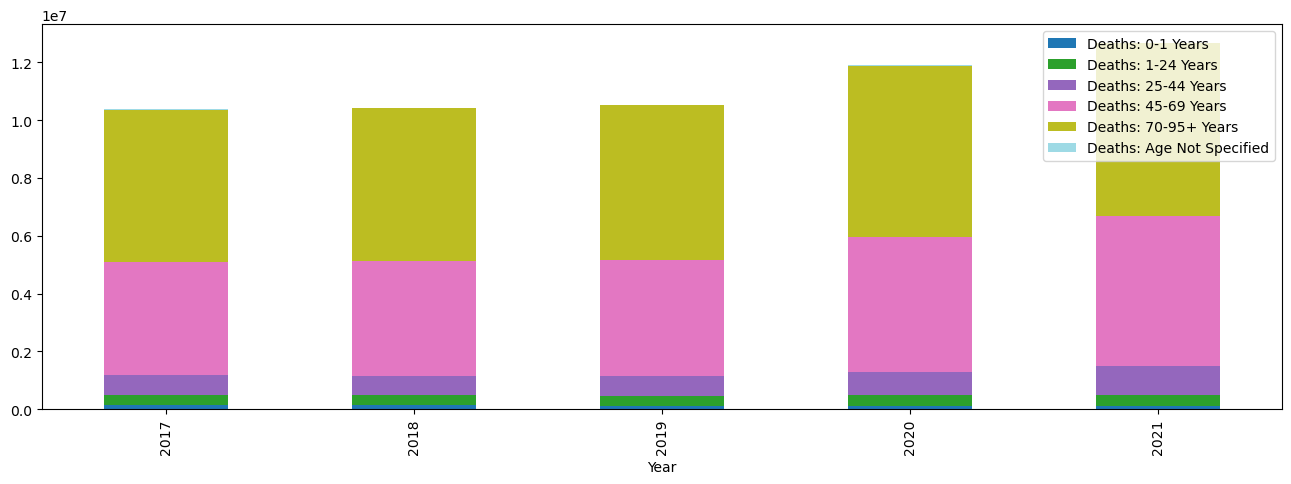

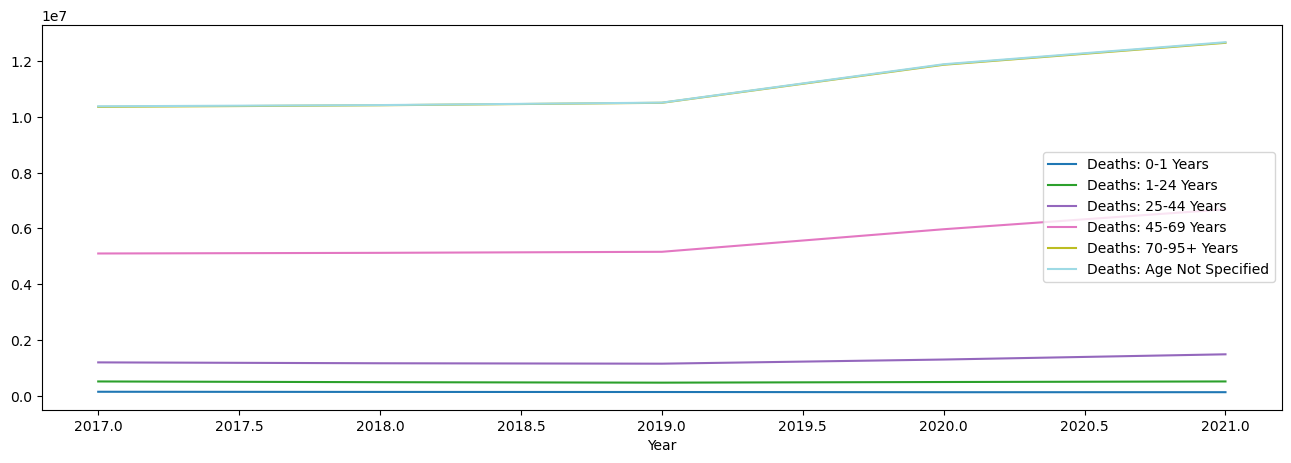

In [127]:
# Grouping by Year, then summing up the deaths across age groups
impact_by_year_icd = df_final.groupby(['Year']).agg({'Deaths: 0-1 Years': 'sum', 'Deaths: 1-24 Years': 'sum', 'Deaths: 25-44 Years': 'sum', 'Deaths: 45-69 Years': 'sum', 'Deaths: 70-95+ Years': 'sum', 'Deaths: Age Not Specified': 'sum'})

# Plotting the graph
impact_by_year_icd.plot(kind='bar', stacked=True, figsize=(16, 5), colormap='tab20')
impact_by_year_icd.plot(kind='line', stacked=True, figsize=(16, 5), colormap='tab20')


<Axes: xlabel='Country Name,Year'>

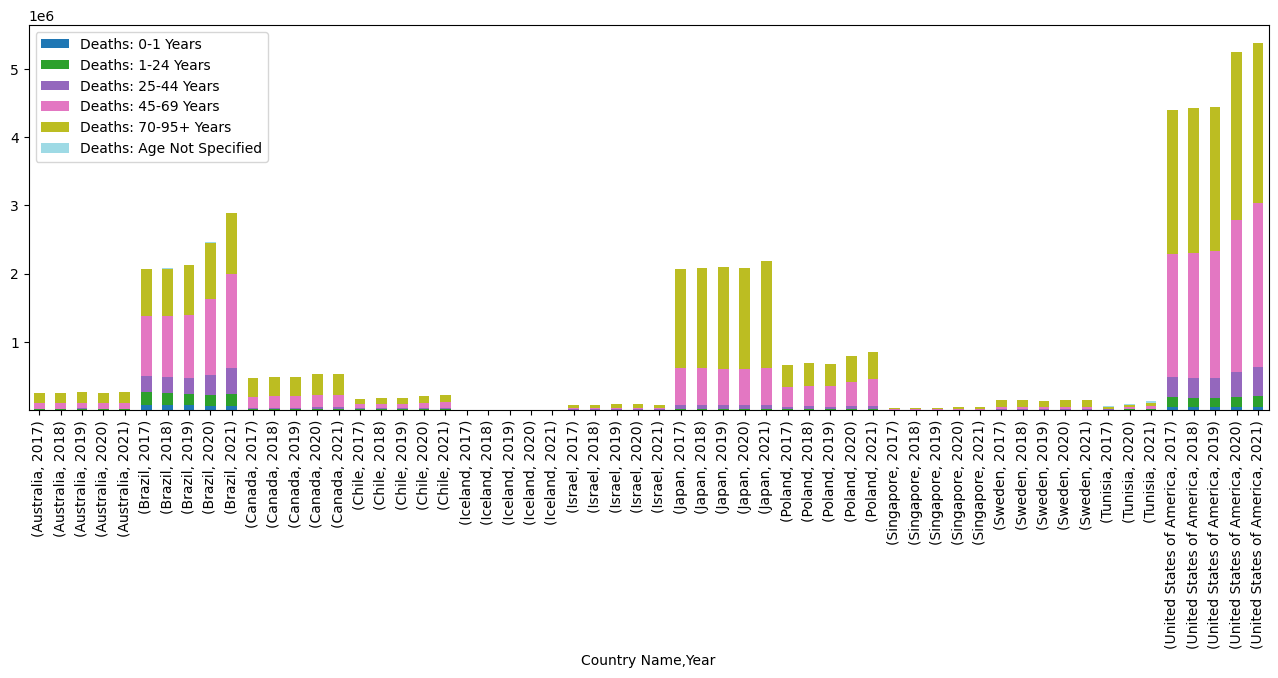

In [121]:
# Grouping by Country and Year, then summing up the deaths across age groups
impact_by_country_year_icd = df_final.groupby(['Country Name', 'Year']).agg({'Deaths: 0-1 Years': 'sum', 'Deaths: 1-24 Years': 'sum', 'Deaths: 25-44 Years': 'sum', 'Deaths: 45-69 Years': 'sum', 'Deaths: 70-95+ Years': 'sum', 'Deaths: Age Not Specified': 'sum'})

# Plotting the graph with country included
impact_by_country_year_icd.plot(kind='bar', stacked=True, figsize=(16, 5), colormap='tab20')


<Axes: xlabel='Year,Country Name'>

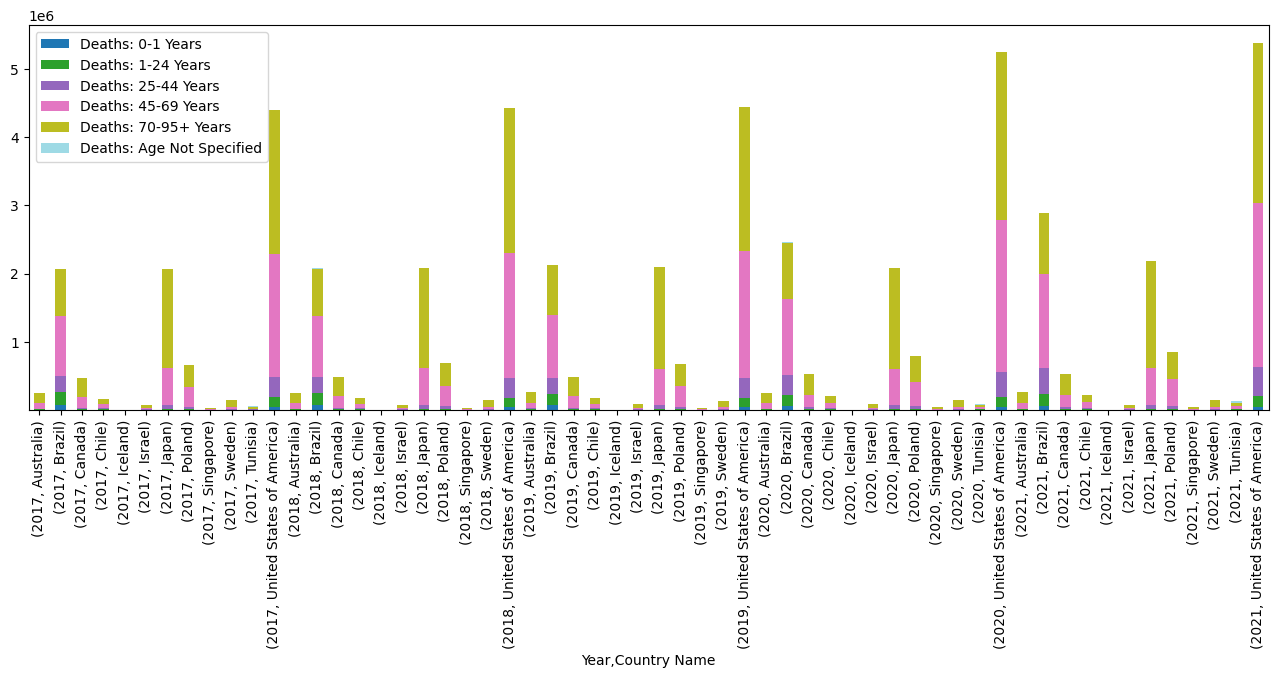

In [120]:
# Grouping by Country and Year, then summing up the deaths across age groups
impact_by_country_year_icd = df_final.groupby(['Year', 'Country Name']).agg({'Deaths: 0-1 Years': 'sum', 'Deaths: 1-24 Years': 'sum', 'Deaths: 25-44 Years': 'sum', 'Deaths: 45-69 Years': 'sum', 'Deaths: 70-95+ Years': 'sum', 'Deaths: Age Not Specified': 'sum'})

# Plotting the graph with country included
impact_by_country_year_icd.plot(kind='bar', stacked=True, figsize=(16, 5), colormap='tab20')

<Axes: xlabel='ICD Category,Year'>

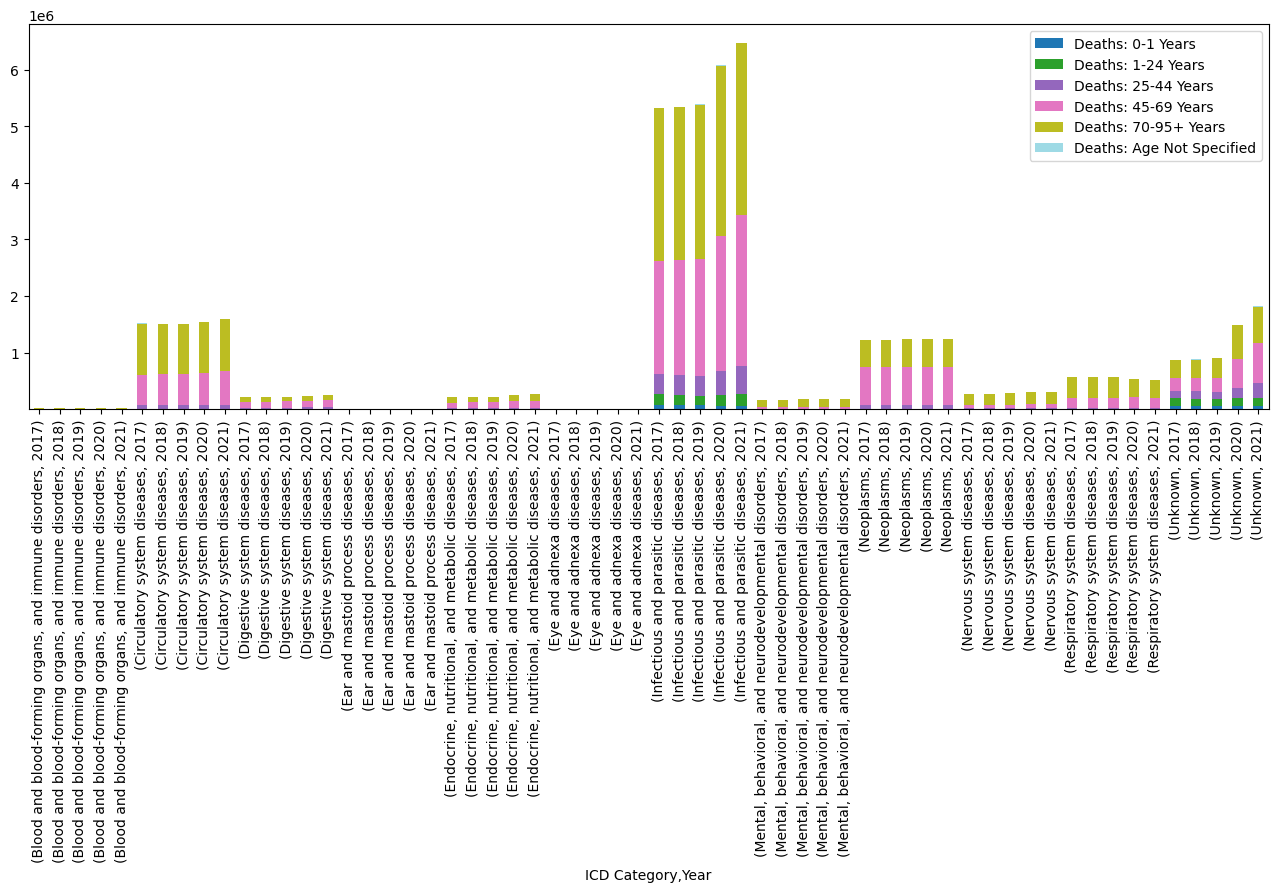

In [124]:
# Grouping by Country and Year, then summing up the deaths across age groups
impact_by_country_year_icd = df_final.groupby(['ICD Category', 'Year']).agg({'Deaths: 0-1 Years': 'sum', 'Deaths: 1-24 Years': 'sum', 'Deaths: 25-44 Years': 'sum', 'Deaths: 45-69 Years': 'sum', 'Deaths: 70-95+ Years': 'sum', 'Deaths: Age Not Specified': 'sum'})

# Plotting the graph with country included
impact_by_country_year_icd.plot(kind='bar', stacked=True, figsize=(16, 5), colormap='tab20')

<Axes: xlabel='Year,ICD Category'>

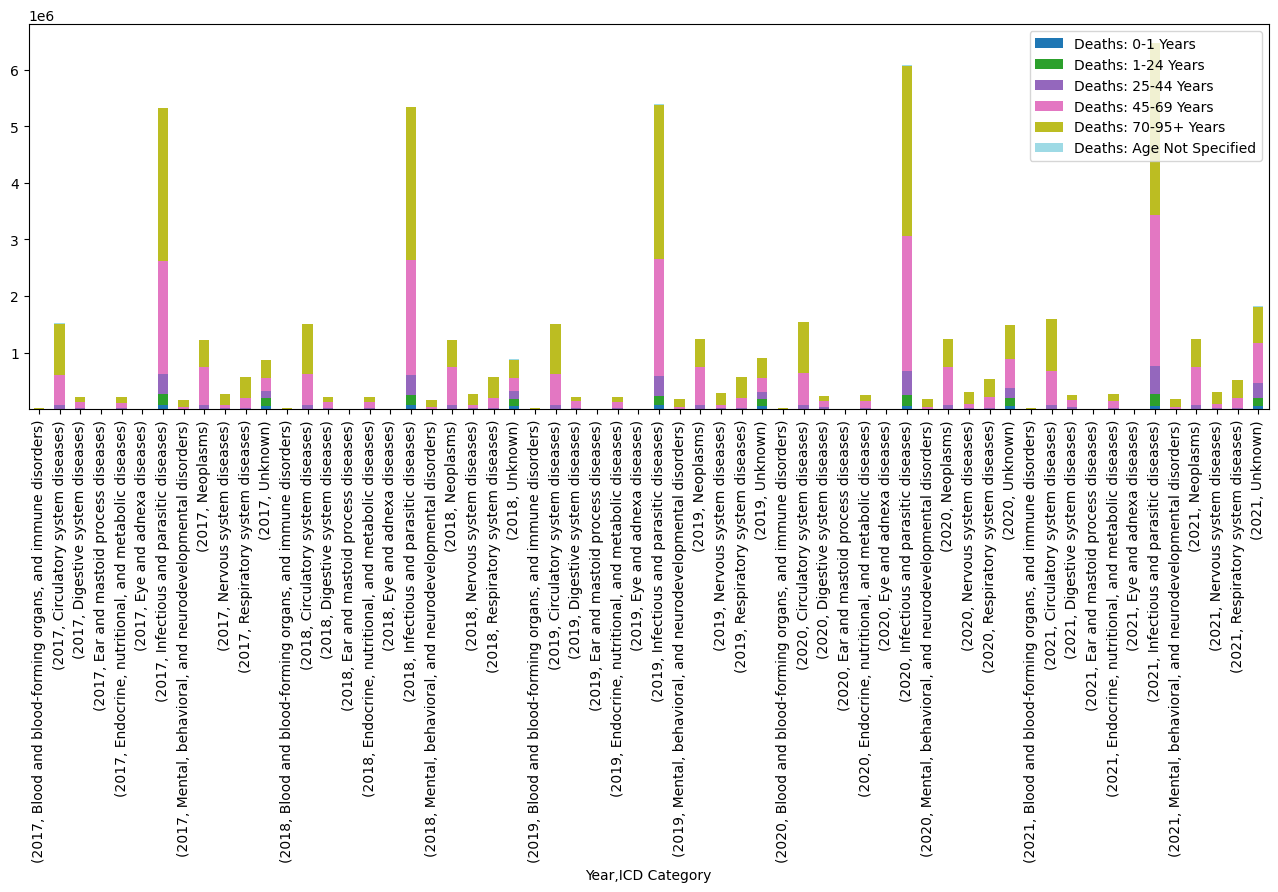

In [125]:
# Grouping by Country and Year, then summing up the deaths across age groups
impact_by_country_year_icd = df_final.groupby(['Year', 'ICD Category']).agg({'Deaths: 0-1 Years': 'sum', 'Deaths: 1-24 Years': 'sum', 'Deaths: 25-44 Years': 'sum', 'Deaths: 45-69 Years': 'sum', 'Deaths: 70-95+ Years': 'sum', 'Deaths: Age Not Specified': 'sum'})

# Plotting the graph with country included
impact_by_country_year_icd.plot(kind='bar', stacked=True, figsize=(16, 5), colormap='tab20')

<Axes: xlabel='Region,Year'>

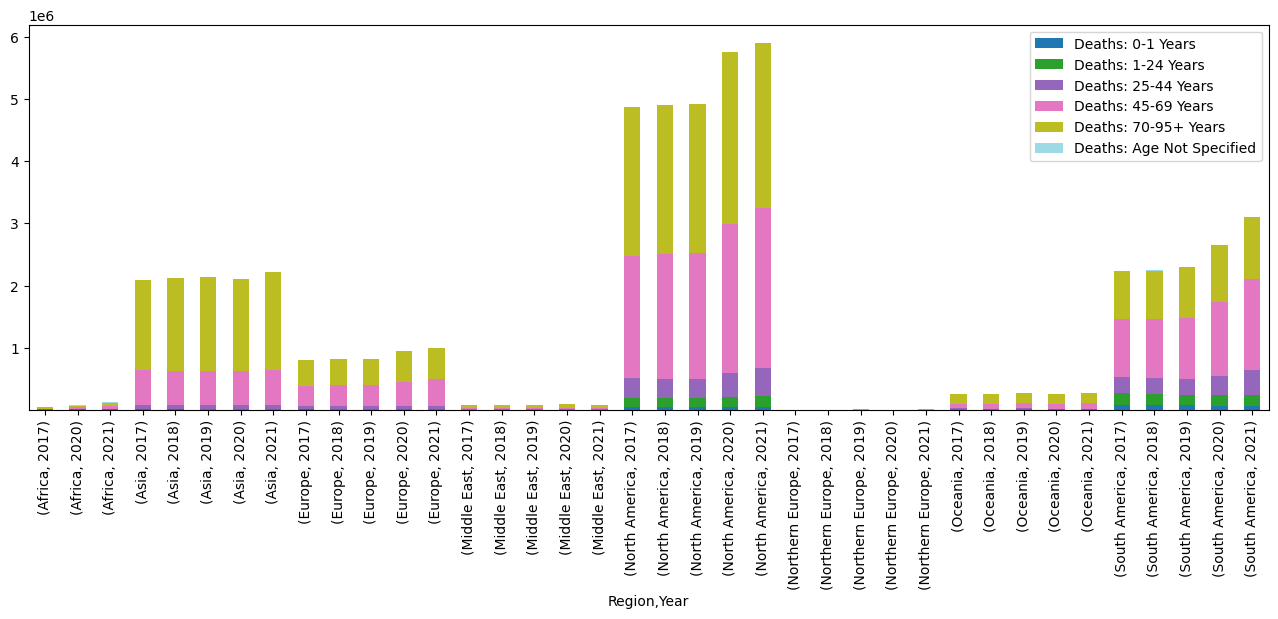

In [128]:
# Grouping by Country and Year, then summing up the deaths across age groups
impact_by_country_year_icd = df_final.groupby(['Region', 'Year']).agg({'Deaths: 0-1 Years': 'sum', 'Deaths: 1-24 Years': 'sum', 'Deaths: 25-44 Years': 'sum', 'Deaths: 45-69 Years': 'sum', 'Deaths: 70-95+ Years': 'sum', 'Deaths: Age Not Specified': 'sum'})

# Plotting the graph with country included
impact_by_country_year_icd.plot(kind='bar', stacked=True, figsize=(16, 5), colormap='tab20')

<Axes: xlabel='Year,Region'>

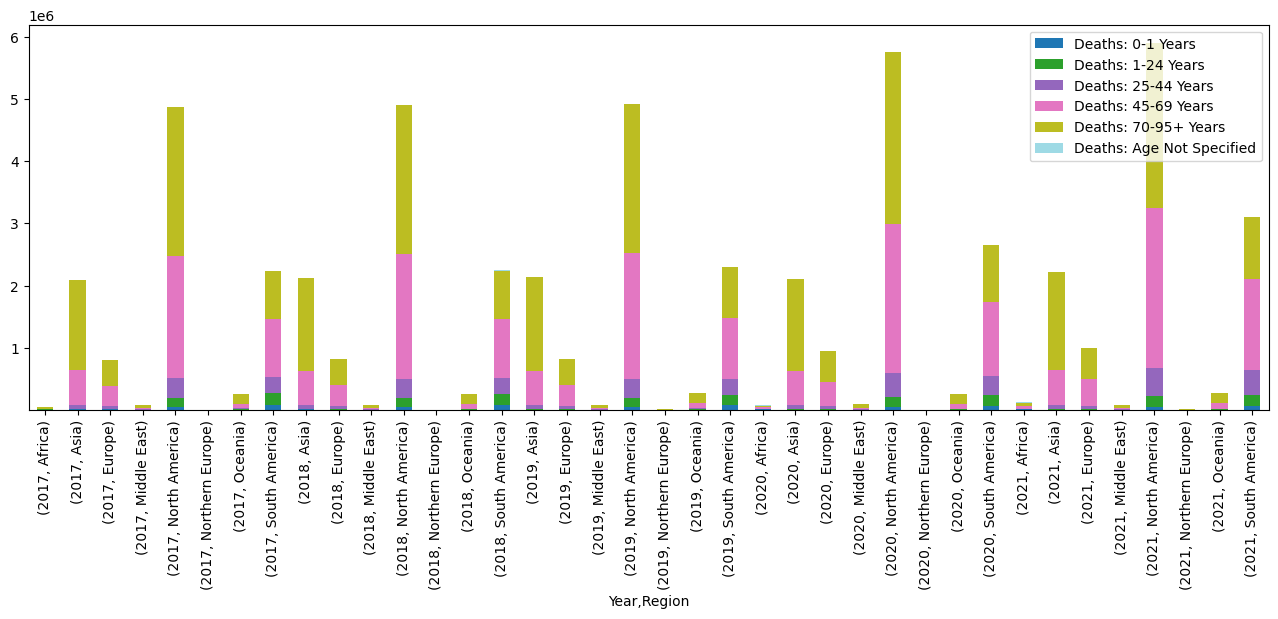

In [129]:
# Grouping by Country and Year, then summing up the deaths across age groups
impact_by_country_year_icd = df_final.groupby(['Year', 'Region']).agg({'Deaths: 0-1 Years': 'sum', 'Deaths: 1-24 Years': 'sum', 'Deaths: 25-44 Years': 'sum', 'Deaths: 45-69 Years': 'sum', 'Deaths: 70-95+ Years': 'sum', 'Deaths: Age Not Specified': 'sum'})

# Plotting the graph with country included
impact_by_country_year_icd.plot(kind='bar', stacked=True, figsize=(16, 5), colormap='tab20')